In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ot
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture 
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# GMM

### Cleaning the data

In [3]:
# Preparing the data

df_3 = pd.read_csv('data\station_40.csv')
df_1 = pd.read_csv('data\station_49.csv')
df_4 = pd.read_csv('data\station_63.csv')
df_2 = pd.read_csv('data\station_80.csv')

col1 = [col + '_1' for col in df_1.columns]
col2 = [col + '_2' for col in df_2.columns]
col3 = [col + '_3' for col in df_3.columns]
col4 = [col + '_4' for col in df_4.columns]
col1[0] = col2[0] = col3[0] = col4[0] = "YEAR"

df_1.columns = col1
df_2.columns = col2
df_3.columns = col3
df_4.columns = col4

full_df = df_1.merge(df_2, on="YEAR").merge(df_3, on="YEAR").merge(df_4, on="YEAR")
full_df.head()

,YEAR,W_1_1,W_2_1,W_3_1,W_4_1,W_5_1,W_6_1,W_7_1,W_8_1,W_9_1,...,W_10_4,W_11_4,W_12_4,W_13_4,W_14_4,W_15_4,W_16_4,W_17_4,W_18_4,YIELD_4
0,0,20.487164,26.089329,25.394672,27.024097,24.426756,26.420241,25.534358,21.369482,18.577526,...,1.462204,3.951453,2.101091,1.141454,2.167033,7.972668,1.555216,6.219460,2.081787,5.97
1,1,21.430837,22.228488,24.205256,29.859199,30.434175,26.467017,27.300290,22.509277,16.388211,...,1.036085,0.879651,5.583977,0.319974,1.612761,3.304209,0.060819,1.540583,3.214933,5.77
2,2,18.841767,25.165941,24.169267,28.742330,27.342035,27.945379,25.710641,22.343698,19.797961,...,3.295700,2.556876,2.165009,2.165768,1.791010,3.012968,4.316012,2.021236,0.814444,8.65
3,3,18.359661,20.235180,22.714217,30.017206,27.192345,23.159092,23.287619,19.477149,18.917730,...,2.872424,3.686682,4.716563,2.837129,0.638416,2.147741,3.114913,1.106072,0.870118,1.07
4,4,21.125963,23.270596,22.949896,26.594044,31.557704,28.464610,27.306957,26.999664,16.666535,...,2.240781,2.920387,1.472874,1.235341,3.050564,0.899664,1.561179,0.975300,3.242242,7.40


In [4]:
### Reorganizing the columns

yields = ["YIELD_1", "YIELD_2", "YIELD_3", "YIELD_4"]

new_col = []
figures = list(range(1, 19))
for j in figures:
    for i in range(1, 5):
        new_col.append(f"W_{j}_{i}" )
        
new_col_t = ["YEAR"] + new_col + yields
full_df = full_df[new_col_t]
full_df.head()

,YEAR,W_1_1,W_1_2,W_1_3,W_1_4,W_2_1,W_2_2,W_2_3,W_2_4,W_3_1,...,W_17_3,W_17_4,W_18_1,W_18_2,W_18_3,W_18_4,YIELD_1,YIELD_2,YIELD_3,YIELD_4
0,0,20.487164,18.325709,21.389266,16.086969,26.089329,24.840126,26.985066,24.245858,25.394672,...,3.046101,6.219460,0.886892,1.037317,2.680206,2.081787,6.37,10.51,10.32,5.97
1,1,21.430837,18.457140,21.314074,14.343275,22.228488,20.501430,22.516442,18.206660,24.205256,...,1.297795,1.540583,1.496904,1.818209,7.477726,3.214933,5.54,6.61,10.39,5.77
2,2,18.841767,16.874268,20.875083,14.787674,25.165941,22.280115,26.038845,21.581075,24.169267,...,3.863088,2.021236,0.682941,0.279352,2.659763,0.814444,4.39,6.86,8.49,8.65
3,3,18.359661,17.102786,20.553688,15.705925,20.235180,18.547797,20.992986,15.706772,22.714217,...,0.914197,1.106072,1.018326,1.468172,0.926442,0.870118,9.28,5.32,7.28,1.07
4,4,21.125963,19.693473,21.523342,16.394038,23.270596,20.145373,21.542900,15.535681,22.949896,...,1.746779,0.975300,1.938053,2.166599,1.708829,3.242242,8.86,6.32,7.31,7.40


<Axes: >

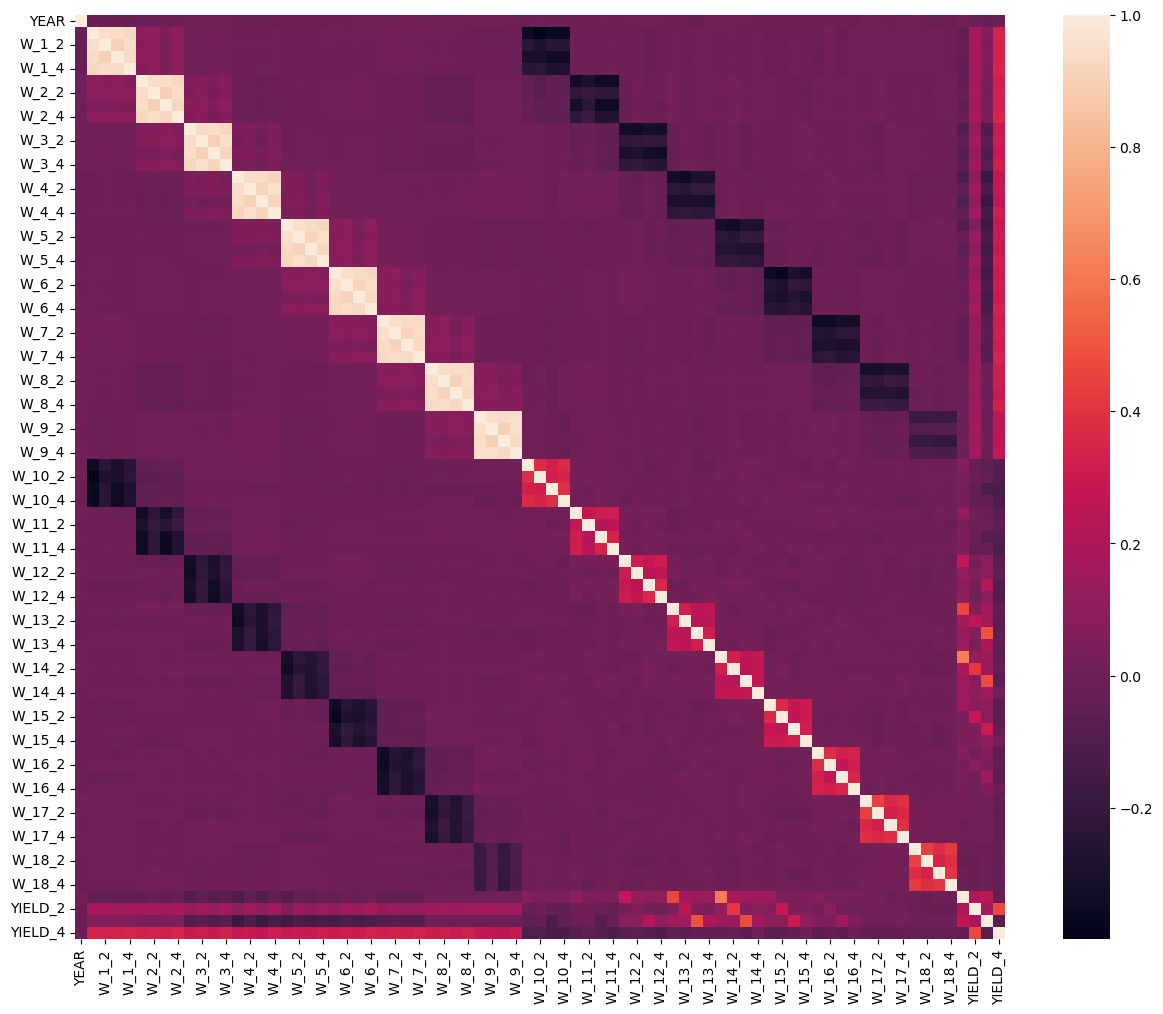

In [5]:
plt.figure(figsize=(15,12))
sns.heatmap(full_df.corr())

In [6]:
# Adding T and R

full_df["T"] = np.sum(full_df[['W_1_1', 'W_2_1', 'W_3_1', 'W_4_1', 'W_5_1', 'W_6_1', 'W_7_1','W_8_1', 'W_9_1', 
                'W_1_2', 'W_2_2', 'W_3_2', 'W_4_2', 'W_5_2', 'W_6_2', 'W_7_2', 'W_8_2', 'W_9_2',
                'W_1_3', 'W_2_3', 'W_3_3', 'W_4_3', 'W_5_3','W_6_3', 'W_7_3', 'W_8_3', 'W_9_3',
                'W_1_4', 'W_2_4', 'W_3_4', 'W_4_4', 'W_5_4', 'W_6_4', 'W_7_4', 'W_8_4', 'W_9_4'
                ]], axis=1) / 36

full_df["R"] = np.sum(full_df[['W_13_1', 'W_14_1','W_15_1', 'W_13_2', 'W_14_2', 'W_15_2', 
                'W_13_3', 'W_14_3', 'W_15_3', 'W_13_4', 'W_14_4', 'W_15_4'
                ]], axis=1) / 12

full_df.head()

,YEAR,W_1_1,W_1_2,W_1_3,W_1_4,W_2_1,W_2_2,W_2_3,W_2_4,W_3_1,...,W_18_1,W_18_2,W_18_3,W_18_4,YIELD_1,YIELD_2,YIELD_3,YIELD_4,T,R
0,0,20.487164,18.325709,21.389266,16.086969,26.089329,24.840126,26.985066,24.245858,25.394672,...,0.886892,1.037317,2.680206,2.081787,6.37,10.51,10.32,5.97,22.404683,2.122557
1,1,21.430837,18.457140,21.314074,14.343275,22.228488,20.501430,22.516442,18.206660,24.205256,...,1.496904,1.818209,7.477726,3.214933,5.54,6.61,10.39,5.77,22.910263,1.443749
2,2,18.841767,16.874268,20.875083,14.787674,25.165941,22.280115,26.038845,21.581075,24.169267,...,0.682941,0.279352,2.659763,0.814444,4.39,6.86,8.49,8.65,23.096885,1.401006
3,3,18.359661,17.102786,20.553688,15.705925,20.235180,18.547797,20.992986,15.706772,22.714217,...,1.018326,1.468172,0.926442,0.870118,9.28,5.32,7.28,1.07,21.252078,1.563658
4,4,21.125963,19.693473,21.523342,16.394038,23.270596,20.145373,21.542900,15.535681,22.949896,...,1.938053,2.166599,1.708829,3.242242,8.86,6.32,7.31,7.40,23.344850,1.398759


In [7]:
# Creating masks

cold = full_df["T"] <= 21.2
mild = (full_df["T"] > 21.2) & (full_df["T"] <= 22)
hot = full_df["T"] > 22

low_rain = full_df["R"] <= 1.8
mild_rain = (full_df["R"] > 1.8) & (full_df["R"] <= 2.2)
strong_rain = full_df["R"] > 2.2

temps = [cold, mild, hot]
rains = [low_rain, mild_rain, strong_rain]

In [8]:
# Creating the local dataframes and storing them in a dico

dico = {i : {"df": None} for i in range(1, 10)}
i = 1
for rain in rains:
    for temp in temps:
        dico[i]["df"] = full_df[rain][temp]
        print(dico[i]["df"].shape)
        i += 1

(464, 79)
(1290, 79)
(1678, 79)
(534, 79)
(1254, 79)
(1082, 79)
(1007, 79)
(1690, 79)
(1001, 79)


C:\Users\User\AppData\Local\Temp\ipykernel_27732\3158835769.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dico[i]["df"] = full_df[rain][temp]


In [9]:
# On a maintenant un bon dico pour travailler !!

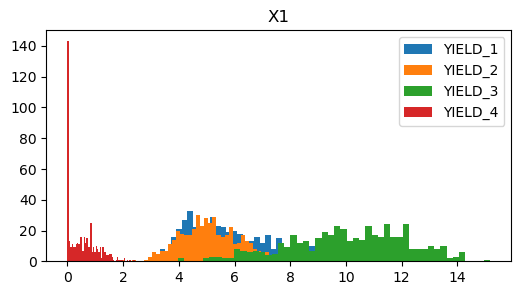

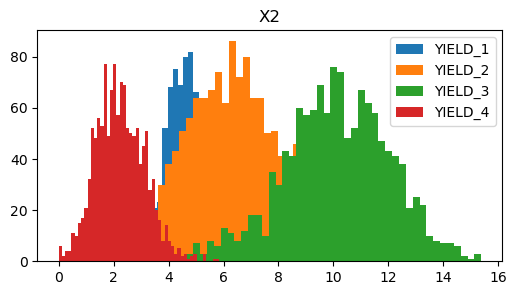

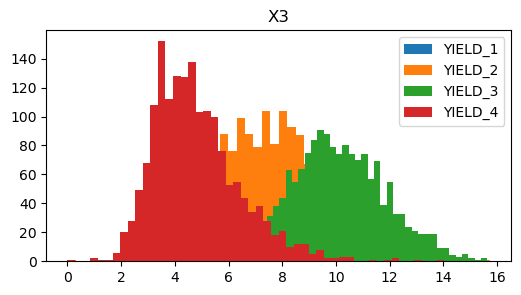

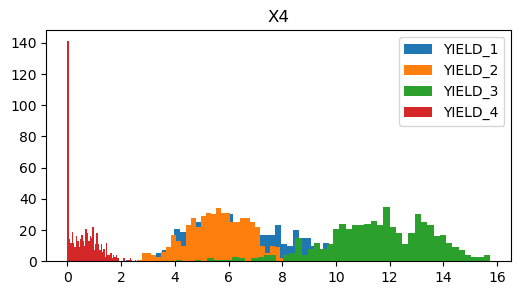

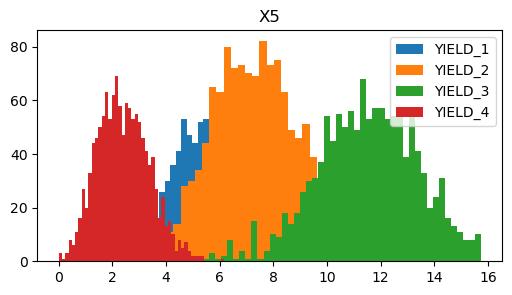

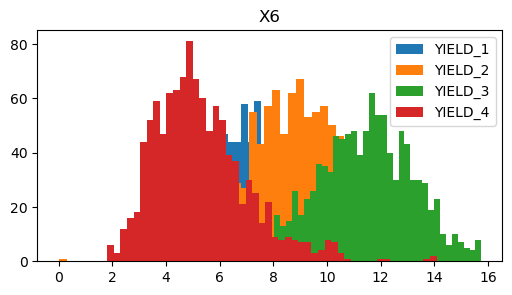

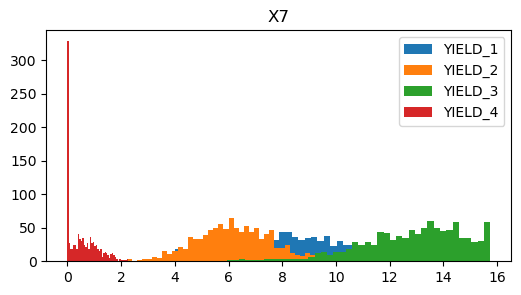

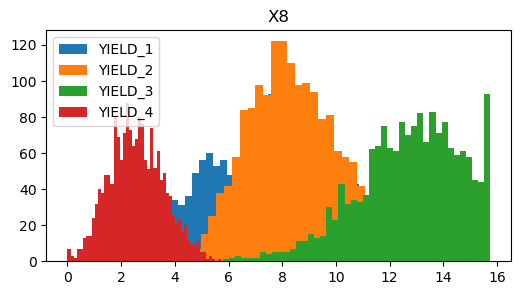

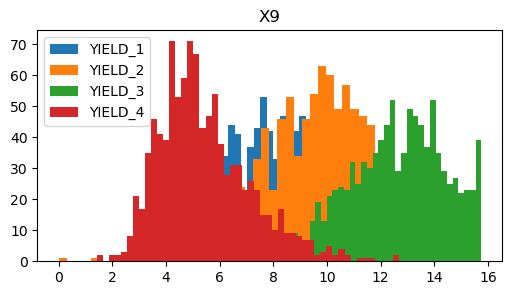

In [9]:
# let's have a look

for i in dico:
    plt.figure(figsize=(6,3))
    for y in yields:
        plt.hist(dico[i]["df"][y], bins=50, label=f"{y}")
    plt.title(f"X{i}")
    plt.legend()
    plt.show()

### Number of components

In [14]:
# Getting the optimal number of components from a BGM

from sklearn.mixture import BayesianGaussianMixture
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

for i in dico:
    bgm = BayesianGaussianMixture(n_components=15, n_init=10, max_iter=200, 
                                  weight_concentration_prior=0.01, verbose=1) #random_state=42
    bgm.fit(dico[i]["df"][yields])
    dico[i]["bgm"] = bgm
    dico[i]["bgm_weights"] = bgm.weights_.round(2)    

Initialization 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration 140
Initialization converged: True
Initialization 1
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
Initialization converged: True
Initialization 2
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration 140
  Iteration 150
Initialization converged: True
Initialization 3
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
  Iteration 80
  Iteration 90
  Iteration 100
  Iteration 110
  Iteration 120
  Iteration 130
  Iteration

In [15]:
# Storing them

for i in dico:
    print(i, (dico[i]["bgm_weights"] > 0).sum())
    dico[i]["optimal_components"] = (dico[i]["bgm_weights"] > 0).sum()

1 7
2 5
3 8
4 6
5 6
6 6
7 10
8 7
9 8


### Simulating

In [17]:
# Training a GM for each subset
# Generating a sample for each of them

from sklearn.mixture import GaussianMixture

for i in range(1,10):
    gm = GaussianMixture(n_components=dico[i]["optimal_components"], n_init=20, init_params='k-means++')
    gm.fit(dico[i]["df"][yields])
    dico[i]["gm"] = gm
    dico[i]["sample"] = gm.sample(len(dico[i]["df"]))[0]
    dico[i]["sample"] = np.where(dico[i]["sample"] > 15.75, 15.75, dico[i]["sample"])
    dico[i]["sample"] = np.where(dico[i]["sample"] < 0, 0, dico[i]["sample"])
    print(i, dico[i]["sample"].shape)


1 (464, 4)
2 (1290, 4)
3 (1678, 4)
4 (534, 4)
5 (1254, 4)
6 (1082, 4)
7 (1007, 4)
8 (1690, 4)
9 (1001, 4)


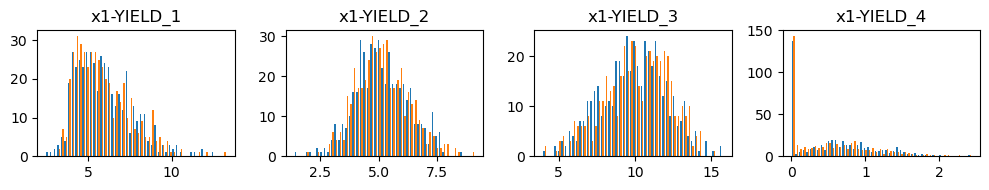

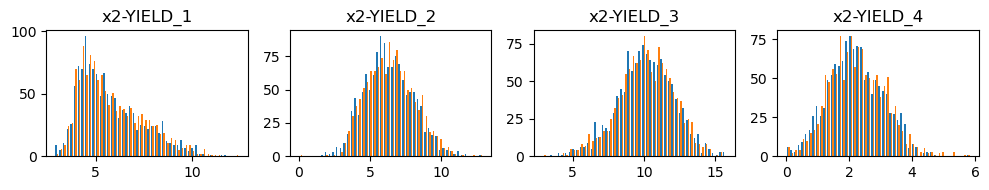

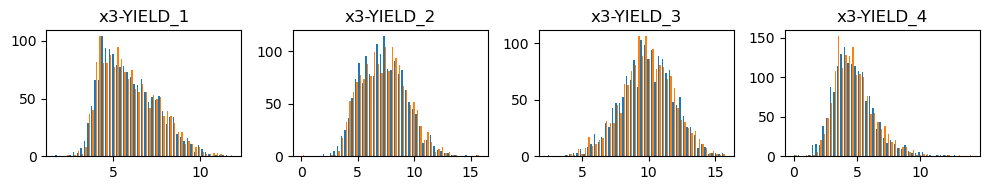

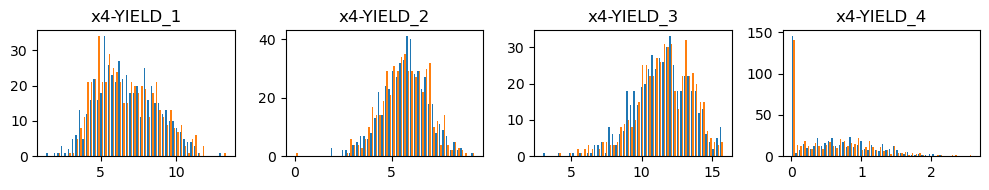

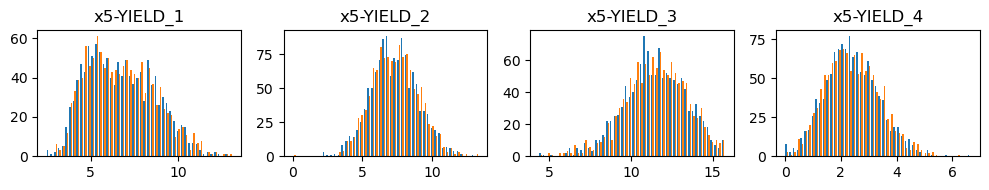

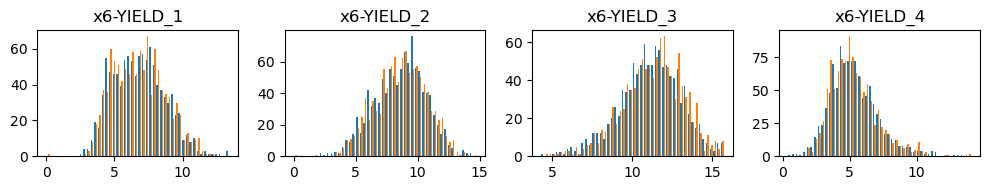

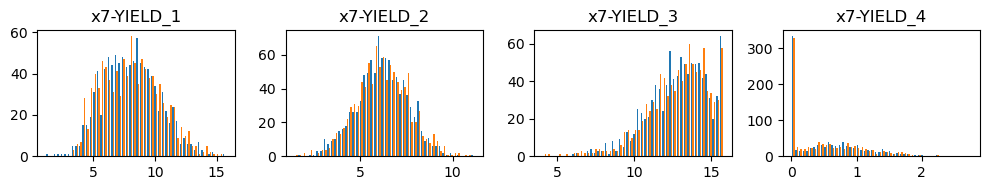

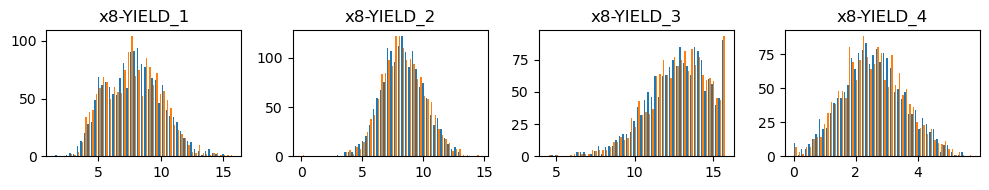

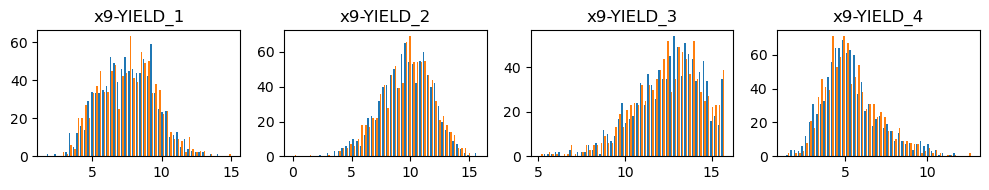

In [18]:
# Let's have a look
for dico_number in range(1,10):
    fig, axs = plt.subplots(1, 4, figsize=(10, 2))
    for i in range(4): 
        axs[i].hist([dico[dico_number]["sample"][:,i], dico[dico_number]["df"][yields[i]]], bins=50)
        axs[i].set_title(f"x{dico_number}-{yields[i]}")
    plt.tight_layout()
    plt.show()

In [22]:
# Averaging SWD on samples and SWD angles #### CLEANER LA WEIGHTED AVERAGE
import ot

tot = 0
w_tot = 0

for i in range(1,10):
    dico[i]["SWD"] = []
    for j in range(1, 10):
        dico[i]["sample"] = dico[i]["gm"].sample(len(dico[i]["df"]))[0]
        dico[i]["sample"] = np.where(dico[i]["sample"] > 15.75, 15.75, dico[i]["sample"])
        dico[i]["sample"] = np.where(dico[i]["sample"] < 0, 0, dico[i]["sample"])
        true_yield = dico[i]["df"][yields].to_numpy()
        for k in range(50):
            dico[i]["SWD"].append(ot.sliced.sliced_wasserstein_distance(true_yield, dico[i]["sample"]))
    dico[i]["mean_SWD"] = np.mean(dico[i]["SWD"])
    print(i, dico[i]["mean_SWD"])
    tot += dico[i]["mean_SWD"]
    w_tot += dico[i]["mean_SWD"] * len(dico[i]["df"])

print(f"Average SWD: {tot/9}")
print(f"Weighted average SWD: {w_tot/10_000}")


1 0.15241411861714005
2 0.09136227469347759
3 0.09567727023755881
4 0.14637080647326856
5 0.09769633236888162
6 0.12464175793783665
7 0.11707835230526444
8 0.09140640055811791
9 0.12436900555056231
Average SWD: 0.1156684798602342
Weighted average SWD: 0.10815276306583385


### Storing them

In [412]:
from joblib import dump, load
import os

directory = 'gmm_models_matt'

for i in range(1, 10):
    filename = os.path.join(directory, f'model_{i}.joblib')
    model = dico[i]['gm']
    # dump(model, filename)

In [441]:
noise = np.load('data/noise.npy')
scenario = np.array([0, 0, 0, 0, 0, 1, 0, 0, 0])

In [442]:
def generator(n, noise=noise, scenario=scenario): ### ATTENTION ENLEVER N
    latent_variable = noise[:, :4]
    
    # Loading the model
    scen = np.argmax(scenario) + 1
    filename = os.path.join(directory, f'model_{scen}.joblib')
    model = load(filename)

    # Getting the parameters
    weights = model.weights_
    means = model.means_
    covariances = model.covariances_

    # Simulating
    simul = np.zeros((4, n))
    for j in range(n):
        component_idx = np.random.choice(np.arange(len(weights)), p=weights)
        S = np.linalg.cholesky(covariances[component_idx])
        simul[:, j] = S @ latent_variable[j] + means[component_idx]

    simul = np.where(simul < 0, 0, simul)
    simul = np.where(simul > 15.75, 15.75, simul)

    return simul.T

In [447]:
for i in range(1, 10):
    n = len(dico[i]["df"])
    scenario = np.zeros(9)
    scenario[i - 1] = 1
    SWDs = []
    for j in range(30):
        SWDs.append(ot.sliced.sliced_wasserstein_distance(
            generator(n=n, scenario=scenario),
            dico[i]["df"][yields].to_numpy()
            ))
    print(i, np.mean(SWDs))

1 0.14201865854689624
2 0.0878735566449366
3 0.09624704816611306
4 0.13900382551568252
5 0.08988579905765483
6 0.11666303380941052
7 0.1112580195361777
8 0.08786191036316322
9 0.12474217450687543


# Oversampling

### By hand with Gaussian noise

In [10]:
X1 = dico[1]["df"][yields]

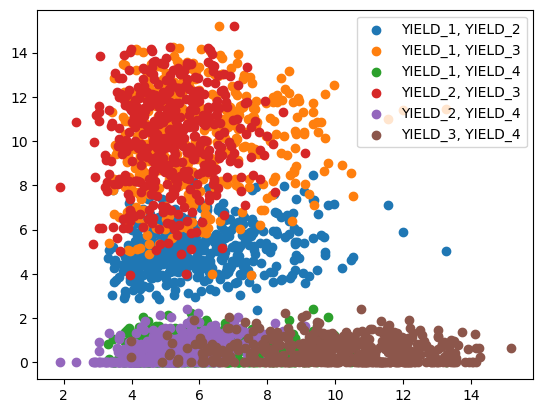

In [11]:
for i in range(4):
    for j in range(i + 1, 4):
        plt.scatter(X1[yields[i]], X1[yields[j]], label=f"{yields[i]}, {yields[j]}")
plt.legend()
plt.show()

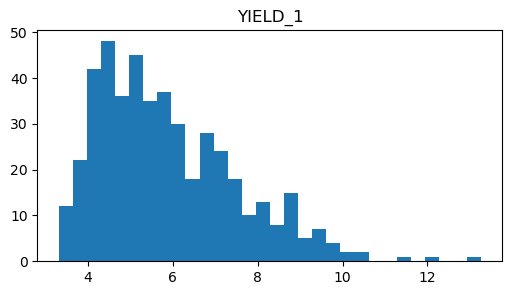

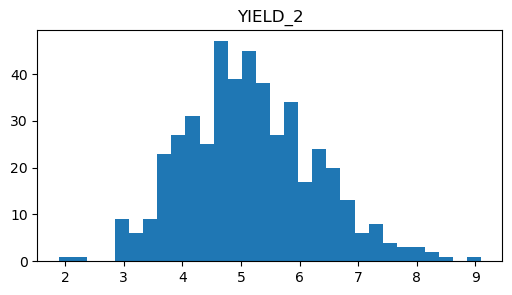

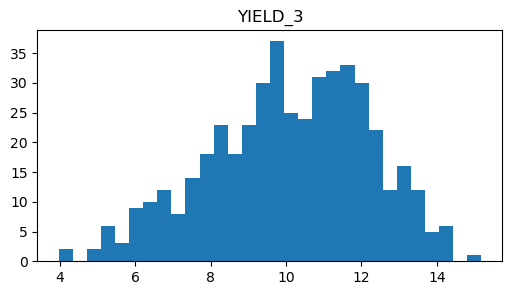

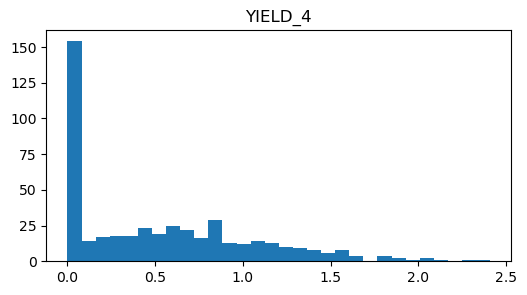

In [12]:
for i in range(4):
    plt.figure(figsize=(6, 3))
    plt.hist(X1[yields[i]], bins=30)
    plt.title(f"{yields[i]}")
    plt.show()

In [13]:
X1_n = X1.copy()
for i in range(4):
    scale = (max(X1[yields[i]]) - min(X1[yields[i]])) / 20
    noise = np.random.normal(loc=0, scale=scale, size=len(X1))
    X1_n.iloc[:, i] += noise
X1_n = (X1_n > 0) * X1_n
X1_n = (X1_n < 15.75) * X1_n + (X1_n > 15.75) * 15.75

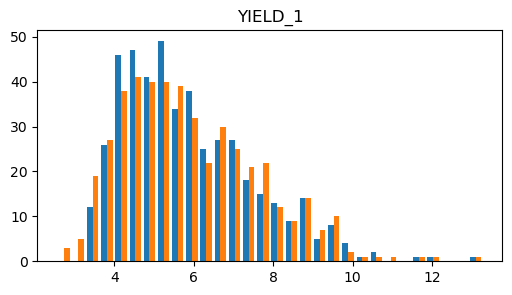

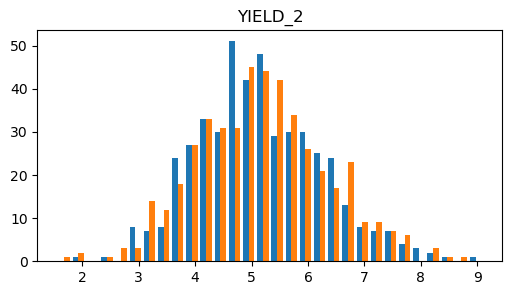

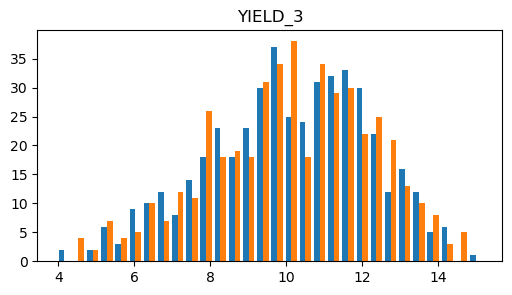

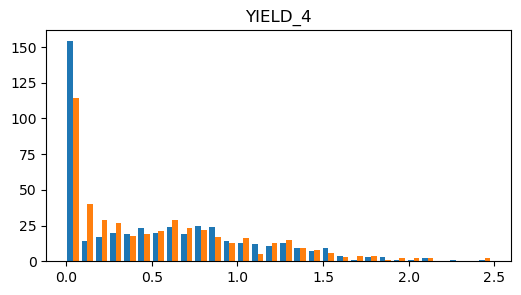

In [14]:
for i in range(4):
    plt.figure(figsize=(6, 3))
    plt.hist([X1[yields[i]], X1_n[yields[i]]], bins=30)
    plt.title(f"{yields[i]}")
    plt.show()

In [15]:
X_big = pd.concat([X1, X1_n])

In [16]:
X_big

,YIELD_1,YIELD_2,YIELD_3,YIELD_4
19,4.140000,3.970000,14.150000,0.000000
34,3.740000,4.130000,11.080000,0.000000
60,4.520000,5.910000,7.630000,0.580000
63,6.750000,4.970000,10.140000,0.580000
83,7.170000,4.640000,7.920000,0.000000
...,...,...,...,...
9901,4.789361,7.480127,8.195142,0.902523
9911,5.266955,4.393800,8.431571,0.741045
9982,6.192932,4.768204,9.691346,0.993454
9986,4.132615,5.945978,12.831186,0.223633


In [36]:
bgm = BayesianGaussianMixture(n_components=15, n_init=10, max_iter=200)
bgm.fit(X_big)

BayesianGaussianMixture(max_iter=200, n_components=15, n_init=10)

In [39]:
(bgm.weights_.round(2) > 0).sum()

11

In [66]:
gm = GaussianMixture(n_components=15, n_init=10)
gm.fit(X_big)

GaussianMixture(n_components=15, n_init=10)

In [72]:
SWDs = []
s = gm.sample(len(X1))[0]
s = np.where(s < 0, 0, s)
for j in range(30):
    SWDs.append(ot.sliced.sliced_wasserstein_distance(
        s,
        X1.to_numpy(),
        n_projections=200
        ))
print(np.mean(SWDs))

0.1551816019441085
